In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Предобработка данных. Считывание, фильтрация от нулевых значений важных признаков, агрегирование данных в таблицу с датой_часом, зоной и количеством поездок

In [3]:
# Задаем границы Нью-Йорка
left_bound=-74.25559
right_bound=-73.70001
hight_bound=40.91553
bottom_bound=40.49612

In [4]:
data_raw=pd.read_csv('yellow_tripdata_2016-05.csv', header=0)#считываем данные из файла

In [5]:
data_raw.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
8,2,2016-05-01 00:00:00,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990,1,N,-73.981079,40.730675,1,8.0,0.5,0.5,0.00,0.0,0.3,9.30
9,2,2016-05-01 00:00:00,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119,1,N,-73.994049,40.761452,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30


In [6]:
data_raw.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11836843,2,2016-05-25 15:42:53,2016-05-26 09:47:01,5,0.0,0.000000,0.000000,1,N,0.0,0.0,2,40.5,0.5,0.5,0.0,0.0,0.3,41.8
11836844,2,2016-05-26 10:21:48,2016-05-26 10:21:48,5,0.0,-73.937317,40.764896,1,N,0.0,0.0,2,696.0,0.5,0.5,0.0,0.0,0.3,697.3
11836845,2,2016-05-27 10:56:09,2016-05-27 10:59:34,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3
11836846,2,2016-05-27 11:37:14,2016-05-27 11:38:25,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,3.0,0.5,0.5,0.0,0.0,0.3,4.3
11836847,2,2016-05-27 12:00:21,2016-05-27 12:24:15,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,14.0,0.5,0.5,0.0,0.0,0.3,15.3
11836848,2,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
11836849,2,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3
11836850,2,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,28.5,0.5,0.5,0.0,0.0,0.3,29.8
11836851,2,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.5,0.5,0.0,0.0,0.3,13.3
11836852,2,2016-05-27 14:38:36,2016-05-27 15:10:15,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4886.0,0.5,0.5,0.0,0.0,0.3,4887.3


In [7]:
data_raw.shape

(11836853, 19)

In [8]:
# Удаляем строки, где нулевая длительность поездки
data_raw1=data_raw.drop(data_raw[data_raw.tpep_pickup_datetime==data_raw.tpep_dropoff_datetime].index)

In [9]:
data_raw1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
11,1,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,40.739685,1,17.0,0.5,0.5,3.65,0.0,0.3,21.95
12,2,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,40.712830,1,16.0,0.5,0.5,3.46,0.0,0.3,20.76


In [10]:
# Удаляем строки, где нулевое расстояние по счетчику
data_raw2=data_raw1.drop(data_raw1[data_raw1.trip_distance==0].index)

In [11]:
# Удаляем строки, где количество пассажиров = 0 
data_raw3=data_raw2.drop(data_raw2[data_raw2.passenger_count==0].index)

In [12]:
print (data_raw.shape[0],'\n', data_raw1.shape[0],'\n', data_raw2.shape[0],'\n', data_raw3.shape[0],'\n')

11836853 
 11824585 
 11763611 
 11763422 



In [13]:
# Удаляем строки, где координаты начала поездки не попадают в квадрат нью-йорка
data_raw4=data_raw3[(data_raw3.pickup_longitude>=left_bound) & 
          (data_raw3.pickup_longitude<=right_bound) & 
          (data_raw3.pickup_latitude<=hight_bound) & (data_raw3.pickup_latitude>=bottom_bound)].copy(deep=True)

In [14]:
data_raw4.shape

(11626521, 19)

In [15]:
data_raw4.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11836832,1,2016-05-31 23:59:59,2016-06-01 00:10:18,1,2.30,-73.975784,40.789474,1,N,-73.994179,40.764069,1,10.0,0.5,0.5,2.26,0.0,0.3,13.56
11836833,1,2016-05-31 23:59:59,2016-06-01 00:07:37,2,1.50,-73.972435,40.754684,1,N,-73.985435,40.738312,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55
11836834,1,2016-05-31 23:53:01,2016-06-01 00:22:49,1,16.20,-73.992004,40.714870,1,N,-73.735626,40.761299,1,45.0,0.5,0.5,9.25,0.0,0.3,55.55
11836835,2,2016-05-31 23:53:01,2016-05-31 23:58:04,1,1.05,-73.978851,40.787628,1,N,-73.988693,40.775139,1,6.0,0.5,0.5,2.19,0.0,0.3,9.49
11836836,2,2016-05-31 23:53:01,2016-06-01 00:05:46,1,2.91,-73.981491,40.728870,1,N,-73.997620,40.755169,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
11836841,1,2016-05-19 03:29:16,2016-05-19 03:31:24,1,0.60,-73.948959,40.586658,1,Y,-73.948570,40.594837,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30


In [16]:
#Копируем таблицу
data_1_step=data_raw4.copy(deep=True)

In [17]:
# Преобразуем данные начала поездок в datetime
data_1_step['tpep_pickup_datetime']=pd.to_datetime(data_1_step['tpep_pickup_datetime'])

In [18]:
# Удаляем минуты и секунды
data_1_step['tpep_pickup_datetime']=data_1_step['tpep_pickup_datetime'].apply(lambda x: x.replace(minute=0, second=0))

In [19]:
data_1_step.tail(10)#Проверяем что получилось

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11836832,1,2016-05-31 23:00:00,2016-06-01 00:10:18,1,2.30,-73.975784,40.789474,1,N,-73.994179,40.764069,1,10.0,0.5,0.5,2.26,0.0,0.3,13.56
11836833,1,2016-05-31 23:00:00,2016-06-01 00:07:37,2,1.50,-73.972435,40.754684,1,N,-73.985435,40.738312,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55
11836834,1,2016-05-31 23:00:00,2016-06-01 00:22:49,1,16.20,-73.992004,40.714870,1,N,-73.735626,40.761299,1,45.0,0.5,0.5,9.25,0.0,0.3,55.55
11836835,2,2016-05-31 23:00:00,2016-05-31 23:58:04,1,1.05,-73.978851,40.787628,1,N,-73.988693,40.775139,1,6.0,0.5,0.5,2.19,0.0,0.3,9.49
11836836,2,2016-05-31 23:00:00,2016-06-01 00:05:46,1,2.91,-73.981491,40.728870,1,N,-73.997620,40.755169,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
11836837,2,2016-05-31 23:00:00,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:00:00,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:00:00,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:00:00,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
11836841,1,2016-05-19 03:00:00,2016-05-19 03:31:24,1,0.60,-73.948959,40.586658,1,Y,-73.948570,40.594837,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30


In [20]:
data_1_step[data_1_step['tpep_pickup_datetime']=='2016-05-01 01:00:00'].head(10)#Проверяем еще что получилось

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
104839,2,2016-05-01 01:00:00,2016-05-01 01:09:31,2,1.19,-73.955986,40.713974,1,N,-73.939507,40.724087,2,6.5,0.5,0.5,0.00,0.00,0.3,7.80
104840,2,2016-05-01 01:00:00,2016-05-01 01:05:31,5,0.56,-73.969673,40.763596,1,N,-73.961700,40.760128,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30
104841,2,2016-05-01 01:00:00,2016-05-01 01:09:39,4,1.18,-73.987671,40.724430,1,N,-73.976791,40.739330,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36
104918,2,2016-05-01 01:00:00,2016-05-01 01:15:45,1,2.78,-73.959259,40.763439,1,N,-73.996567,40.766727,1,12.0,0.5,0.5,1.00,0.00,0.3,14.30
104919,1,2016-05-01 01:00:00,2016-05-01 01:11:59,1,1.30,-73.978485,40.745350,1,N,-73.990868,40.756123,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
104920,1,2016-05-01 01:00:00,2016-05-01 01:05:40,2,0.20,-73.983459,40.730141,1,N,-73.981300,40.733215,2,3.5,0.5,0.5,0.00,0.00,0.3,4.80
104921,1,2016-05-01 01:00:00,2016-05-01 01:13:03,1,1.80,-73.991028,40.718334,1,N,-74.011002,40.709988,1,8.5,0.5,0.5,1.95,0.00,0.3,11.75
104922,1,2016-05-01 01:00:00,2016-05-01 01:22:44,1,2.50,-73.979614,40.767094,1,N,-73.997269,40.737896,1,14.5,0.5,0.5,3.15,0.00,0.3,18.95
104923,2,2016-05-01 01:00:00,2016-05-01 01:05:22,2,0.48,-73.961853,40.795620,1,N,-73.967720,40.793018,1,4.0,0.5,0.5,1.06,0.00,0.3,6.36
104924,2,2016-05-01 01:00:00,2016-05-01 01:43:30,4,24.24,-73.948044,40.778564,1,N,-73.657875,40.656643,2,65.0,0.5,0.5,0.00,5.54,0.3,71.84


In [21]:
#Проверяем что получилось еще больше
data_1_step.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
11,1,2016-05-01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,40.739685,1,17.0,0.5,0.5,3.65,0.0,0.3,21.95
12,2,2016-05-01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,40.712830,1,16.0,0.5,0.5,3.46,0.0,0.3,20.76


In [22]:
# Считываем таблицу районов
boros=pd.read_csv('regions.csv', header=0, sep=';')

In [23]:
boros.head()# Проверяем таблицу районов

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [24]:
boros.tail()# Проверяем таблицу районов

,region,west,east,south,north
2495,2496,-73.711122,-73.70001,40.873589,40.881977
2496,2497,-73.711122,-73.70001,40.881977,40.890365
2497,2498,-73.711122,-73.70001,40.890365,40.898754
2498,2499,-73.711122,-73.70001,40.898754,40.907142
2499,2500,-73.711122,-73.70001,40.907142,40.915530


In [25]:
y_array=np.array(pd.unique(boros.west)) # Создаем массив границ районов по долготе

In [26]:
x_array=np.array(pd.unique(boros.south))# Создаем массив границ районов по широте

In [27]:
y_array=np.append(y_array, right_bound)# Добавляем крайнюю границу массива разбиения по долготе
x_array=np.append(x_array, hight_bound)# Добавляем крайнюю границу массива разбиения по широте

In [28]:
y_array# Посмотрим массивы размиений на квадраты

array([-74.25559  , -74.2444784, -74.2333668, -74.2222552, -74.2111436,
       -74.200032 , -74.1889204, -74.1778088, -74.1666972, -74.1555856,
       -74.144474 , -74.1333624, -74.1222508, -74.1111392, -74.1000276,
       -74.088916 , -74.0778044, -74.0666928, -74.0555812, -74.0444696,
       -74.033358 , -74.0222464, -74.0111348, -74.0000232, -73.9889116,
       -73.9778   , -73.9666884, -73.9555768, -73.9444652, -73.9333536,
       -73.922242 , -73.9111304, -73.9000188, -73.8889072, -73.8777956,
       -73.866684 , -73.8555724, -73.8444608, -73.8333492, -73.8222376,
       -73.811126 , -73.8000144, -73.7889028, -73.7777912, -73.7666796,
       -73.755568 , -73.7444564, -73.7333448, -73.7222332, -73.7111216,
       -73.70001  ])

In [29]:
x_array

array([40.49612  , 40.5045082, 40.5128964, 40.5212846, 40.5296728,
       40.538061 , 40.5464492, 40.5548374, 40.5632256, 40.5716138,
       40.580002 , 40.5883902, 40.5967784, 40.6051666, 40.6135548,
       40.621943 , 40.6303312, 40.6387194, 40.6471076, 40.6554958,
       40.663884 , 40.6722722, 40.6806604, 40.6890486, 40.6974368,
       40.705825 , 40.7142132, 40.7226014, 40.7309896, 40.7393778,
       40.747766 , 40.7561542, 40.7645424, 40.7729306, 40.7813188,
       40.789707 , 40.7980952, 40.8064834, 40.8148716, 40.8232598,
       40.831648 , 40.8400362, 40.8484244, 40.8568126, 40.8652008,
       40.873589 , 40.8819772, 40.8903654, 40.8987536, 40.9071418,
       40.91553  ])

In [30]:
# Создаем массив "Дата_час" со значениями этого параметра
b=pd.unique(data_1_step['tpep_pickup_datetime'])

In [31]:
len(b)# Проверяем длину

744

In [32]:
b[-10:] # посмотрим 10 дат с конца

array(['2016-05-31T14:00:00.000000000', '2016-05-31T15:00:00.000000000',
       '2016-05-31T16:00:00.000000000', '2016-05-31T17:00:00.000000000',
       '2016-05-31T18:00:00.000000000', '2016-05-31T19:00:00.000000000',
       '2016-05-31T20:00:00.000000000', '2016-05-31T21:00:00.000000000',
       '2016-05-31T22:00:00.000000000', '2016-05-31T23:00:00.000000000'],
      dtype='datetime64[ns]')

In [55]:
#Создаем таблицу, куда будем агрегировать данные
table=pd.DataFrame(columns=boros.region.values)

In [56]:
table #Смотрим как она выглядит

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500


In [57]:
#Перебираем каждую дату_час и считаем количество поездко из каждого квадрата. Преобразуем полученный массив частот из 
# размера 50Х50 в размер 1Х2500. Потом добавляем строку (масив 1Х2500) в таблицу для агрегации.
for i in range(len(b)):
    binn1 = stats.binned_statistic_2d(data_1_step[data_1_step.tpep_pickup_datetime==b[i]].pickup_longitude, 
                                      data_1_step[data_1_step.tpep_pickup_datetime==b[i]].pickup_latitude, None,
                                 'count', bins=[y_array, x_array])
    c=np.reshape(binn1.statistic, (1,2500))
    table=table.append(pd.DataFrame(c, columns=table.columns ), ignore_index=True)

In [58]:
table['Day_hour']=b #Добавляем столбец с Датой_часом

In [59]:
table.tail()# Проверяем что получилось

,1,2,3,4,5,6,7,8,9,10,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,Day_hour
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 19:00:00
740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 20:00:00
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 21:00:00
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 22:00:00
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 23:00:00


In [60]:
# Кусочек чтоб переместить столбец с датами в начало таблицы
cols = table.columns #Считываем названия столбцов
cols1=list(map(str, cols))# Переводим названия столбцов в формат str
table.columns=cols1# Меняем названия столбцов
cols2=cols1[-1:] + cols1[:-1] # Перемещаем Дата_час в начало списка названий столбцов
table=table[cols2]# Перемещаем столбец Дата_час вперед

In [61]:
# Сортуем таблицу по возрастанию значения Дата_час
table.sort_values(by=['Day_hour'], inplace=True)
table.index=range(len(b))

In [62]:
table.head(10) # Проверяем что получилось

,Day_hour,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,2016-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-05-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-05-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-05-01 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-05-01 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-05-01 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# проверка работы таблицы. Запрашиваем количество поездок из района 1281 в день 2016-05-30 в 09:00:00
table[table.Day_hour=='2016-05-19 13:00:00']['1281']

445    862.0
Name: 1281, dtype: float64

### График поездок из района, где находится Эмпайр Стайт Билдинг

In [64]:
# Координаты Эмпайр Стайт Билдинг
esb_long=-73.98583
esb_latit=40.747780

In [65]:
boros.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [66]:
boros[(boros.west<=esb_long) & (boros.south<=esb_latit)].tail()

,region,west,east,south,north
1226,1227,-73.988912,-73.9778,40.714213,40.722601
1227,1228,-73.988912,-73.9778,40.722601,40.730990
1228,1229,-73.988912,-73.9778,40.730990,40.739378
1229,1230,-73.988912,-73.9778,40.739378,40.747766
1230,1231,-73.988912,-73.9778,40.747766,40.756154


In [86]:
# Значит квадрат, где башня, такой:
esp_zone=1231

<Figure size 1224x576 with 0 Axes>

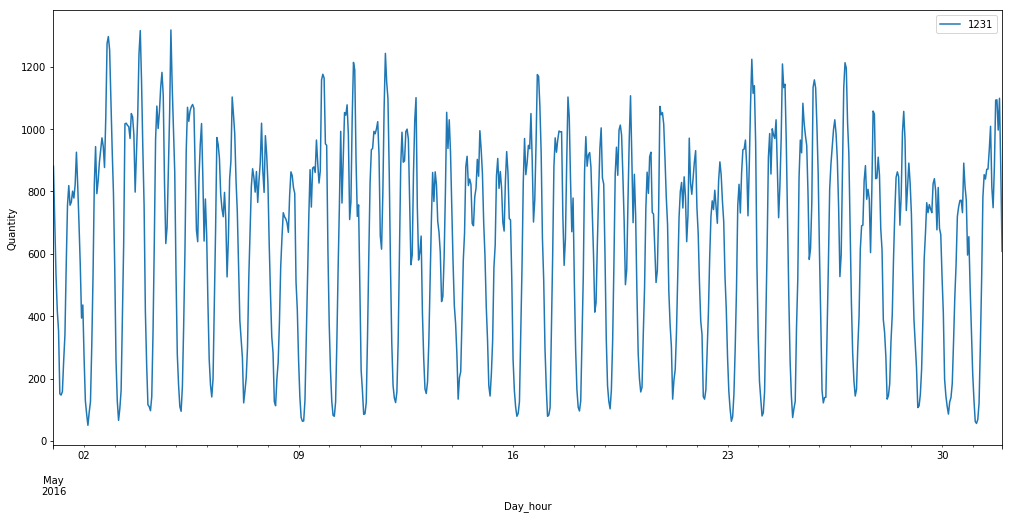

In [85]:
# Строим график данных по времени
plt.figure(figsize(17,8))
table.plot(x='Day_hour', y='1231')
plt.xlabel('Day_hour')
plt.ylabel('Quantity')
pylab.show()

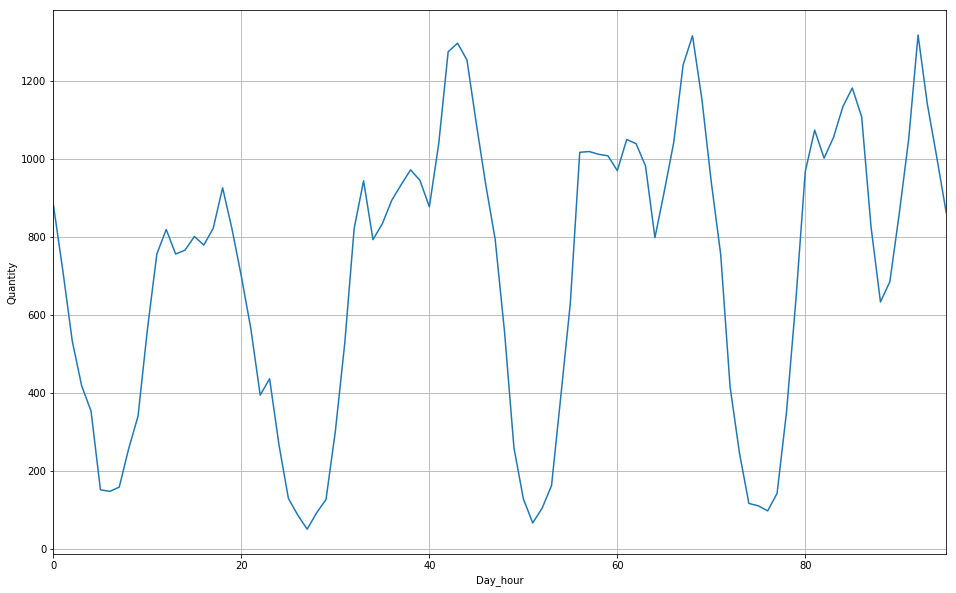

In [87]:
# Строим график данных по времени для первых 100 часов мая 2016
plt.figure(figsize(16,10))
table['1231'][:96].plot(x='Day_hour', y='1230', grid=True)
plt.xlabel('Day_hour')
plt.ylabel('Quantity')
pylab.show()

In [88]:
# Посмотрим первые 48 часов мая. Может увижу периодичность значения количества поездок.
table[['Day_hour','1231']][:48]

,Day_hour,1231
0,2016-05-01 00:00:00,881.0
1,2016-05-01 01:00:00,713.0
2,2016-05-01 02:00:00,533.0
3,2016-05-01 03:00:00,418.0
4,2016-05-01 04:00:00,353.0
5,2016-05-01 05:00:00,151.0
6,2016-05-01 06:00:00,147.0
7,2016-05-01 07:00:00,158.0
8,2016-05-01 08:00:00,256.0
9,2016-05-01 09:00:00,340.0


### Количество ячеек Дата_час - зона с нулевым числом поездок

In [71]:
from collections import Counter

In [72]:
num_zeros=0 # Задаем параметр количество нулевых поездок

In [73]:
# Считаем количество нулевых ячеек для каждого столбца, соответствующего определенной зоне
for name in (table.columns[1:]):
    num_zeros=num_zeros+Counter(table[name])[0]

In [75]:
# Выводим число нулевых поездок
print ('Количество ячеек с нулевым числом поездок: ', num_zeros)

Количество ячеек с нулевым числом поездок:  1718238


In [77]:
# Количество ячеек с ненулевым числом поездок
print('Количество ячеек с ненулевым числом поездок: ',744*2500 - num_zeros)

Количество ячеек с ненулевым числом поездок:  141762


In [90]:
table.to_csv('table.csv')